In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [142]:
names = ['stock_number','date','stock_name','open','high','low','close','volume']
dtype = {'stock_number':np.str, 'date':np.int32, 'open':np.float16,'high':np.float16,'low':np.float16,'close':np.float16,'volume':np.int32}

#dataset
tetfp = pd.read_csv('C:/Users/USER/Desktop/tbrain/dataset/tetfp.txt', encoding='big5hkscs',  sep='\s+', names=names, dtype=dtype, low_memory=False)
tetfp_2017 = tetfp[tetfp.date > 20170000]
tsharep = pd.read_csv('C:/Users/USER/Desktop/tbrain/dataset/tsharep.txt', encoding='big5hkscs', sep='\s+', names=names, dtype=dtype, low_memory=False)
tsharep_2017 = tsharep[tsharep.date > 20170000]
weight_0050 = pd.read_csv('C:/Users/USER/Desktop/tbrain/dataset/0050_2018s1.txt', encoding='big5hkscs', sep='\s+', names=['stock_number', 'stock_name', 'stock_rate'], dtype={'stock_number':np.str})
weight_0050 = weight_0050[weight_0050.stock_rate > 0.02]
weight_0050

,stock_number,stock_name,stock_rate
3,1301,台塑,0.0299
4,1303,南亞塑膠,0.0272
5,1326,台化,0.0219
15,2881,富邦金,0.0218
16,2882,國泰金,0.0244
23,2891,中信金,0.0227
31,2330,台積電,0.3503
33,2454,聯發科,0.0296
41,3008,大立光,0.0203
43,2412,中華電,0.0253


In [8]:
#2017以後有321天
#2018以後有75天
len(tetfp_2017[tetfp_2017.stock_number=='0050'])

321

In [143]:
def diffRateGen(data):
    diffRate = [0.0]
    for i in range(len(data)):
        if(i != 0):
            if(data[i-1]==0): 
                diffRate.append(0)
            else: 
                diffRate.append((data[i]-data[i-1])/data[i-1])
    return diffRate

In [146]:
def ma(days, data):
    ma = []
    for i in range(len(data)):
        if(i >= days-1):
            value = 0.0
            for j in range(days):
                value += data[i-j]
            ma.append(value/days)
        else: 
            ma.append(0.0)
    return ma

In [144]:
def closeGen(stock_number, dataset, data_len=321):
    close = dataset[dataset.stock_number==stock_number].close.values
    #possiblely shorter close_array
    if(len(close)!=data_len):
            close = np.concatenate([close, np.zeros(data_len-len(close))])
    return close
    
def weightETF(data_len=321):
    weighted_data = np.zeros(data_len)
    weighted_diffRate = np.zeros(data_len)
    for i in weight_0050.values:
        stock_number = i[0]
        weight = i[2]
        close = closeGen(stock_number, tsharep_2017)
        diffRate = diffRateGen(close)     
        weighted_data += np.multiply(diffRate,weight)
    return weighted_data


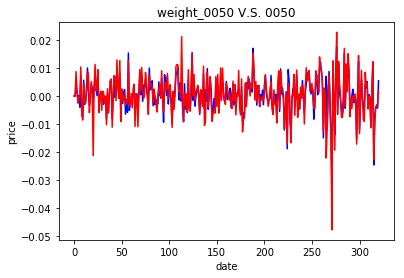

In [145]:
#blue
weighted_etf = weightETF()
#red
etf = tetfp_2017[tetfp_2017.stock_number=='0050'].close.values
etf_diffRate = diffRateGen(etf)

#plot_and_compare
date = np.arange(321)
plt.plot(date, weighted_etf, color='blue')
plt.plot(date, etf_diffRate, color='red')
plt.xlabel("date") 
plt.ylabel("price") 
plt.title("weight_0050 V.S. 0050") 
plt.show() 

In [139]:
import requests
import numpy as np
import pandas as pd
import json
 
df = pd.DataFrame(data={"stkcd": [], "name": [], "ename": [], "qty": [], "cashinlieu": [], "minimum": []})
months = ['01','02','03','04']
days = [31,28,31,30]
for i in range(4):
    for j in range(days[i]):
        day = str(j+1)
        if(len(day)<=1): day = '0'+ day
        date = '2018' + months[i] + day
        url = 'http://www.yuantaetfs.com/api/Composition?date='+ date +'&fundid=1066'
        r = requests.get(url)
        df1 = pd.read_json(r.text)
        df1['date']=date
        df = pd.concat([df,df1], ignore_index=True)
df = df.astype(dtype= {"stkcd":"str"})
df.sort_values(by=['stkcd', 'date'])


,cashinlieu,date,ename,minimum,name,qty,stkcd
0,N,20180102,Taiwan Cement Corp.,Y,台泥,8926.0,1101.0
50,N,20180103,Taiwan Cement Corp.,Y,台泥,8926.0,1101.0
100,N,20180104,Taiwan Cement Corp.,Y,台泥,8926.0,1101.0
150,N,20180105,Taiwan Cement Corp.,Y,台泥,8926.0,1101.0
200,N,20180108,Taiwan Cement Corp.,Y,台泥,8926.0,1101.0
250,N,20180109,Taiwan Cement Corp.,Y,台泥,8925.0,1101.0
300,N,20180110,Taiwan Cement Corp.,Y,台泥,8925.0,1101.0
350,N,20180111,Taiwan Cement Corp.,Y,台泥,8925.0,1101.0
400,N,20180112,Taiwan Cement Corp.,Y,台泥,8925.0,1101.0
450,N,20180115,Taiwan Cement Corp.,Y,台泥,8925.0,1101.0


In [131]:
from bs4 import BeautifulSoup
import json
import requests

weight_0050 = pd.read_csv('C:/Users/USER/Desktop/tbrain/dataset/0050_2018s1.txt', encoding='big5hkscs', sep='\s+', names=['stock_number', 'stock_name', '2018s1'], dtype={'stock_number':np.str})
title = ['2017s1','2017s2','2017s3','2017s4']
season = ['01','02','03','04']
for i in range(len(season)):
    url = "http://mops.twse.com.tw/mops/web/ajax_t78sb04"
    param = "encodeURIComponent=1&step=1&firstin=1&off=1&TYPEK=all&EID=0&year=106&season="+season[i]
    r = requests.post(url+"?"+param)
    r.encoding = 'utf-8'
    soup = BeautifulSoup(r.text, 'html.parser')
    
    stock_name = []
    weight = []
    table = soup.find('table',  class_="hasBorder")
    l_tags = table.find_all('td', style="text-align:left !important;")
    r_tags = table.find_all('td', style="text-align:right !important;")
    for j in range(100):
        if(j%2==0):
            stock_name.append(l_tags[j].string)
            weight.append(float((r_tags[j].string)[:-1])*0.01)
            
    data = (np.array([stock_name, weight]).T).tolist()
    col = ['stock_name']
    col.append(title[i])
    crawl_data = pd.DataFrame(data, columns=col)
    weight_0050 = pd.merge(weight_0050, crawl_data,  how='outer', on=['stock_name'])

In [141]:
weight_0050.sort_values(by=['2018s1', '2017s4'], ascending=False)

,stock_number,stock_name,2018s1,2017s1,2017s2,2017s3,2017s4
31,2330,台積電,0.3503,0.2986,0.3039,0.31930000000000003,0.33530000000000004
47,2317,鴻海,0.0779,0.08990000000000001,0.1058,0.098,0.0864
3,1301,台塑,0.0299,0.029300000000000003,0.027400000000000004,0.0275,0.0292
33,2454,聯發科,0.0296,0.0207,0.0232,0.0263,0.0263
4,1303,南亞塑膠,0.0272,0.0271,0.0258,0.026000000000000002,0.0267
43,2412,中華電,0.0253,0.0258,0.024900000000000002,0.0244,0.0245
16,2882,國泰金,0.0244,0.0255,0.0239,0.0233,0.0256
23,2891,中信金,0.0227,0.022400000000000003,0.0219,0.0213,0.0226
5,1326,台化,0.0219,0.027400000000000004,0.0198,0.0194,0.021400000000000002
15,2881,富邦金,0.0218,0.023700000000000002,0.0216,0.0213,0.0227
